In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
import time
en_stopwords = set(stopwords.words("english")) 

Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration.Linear Support Vector Machine is widely regarded as one of the best text classification algorithms.

SVM is a supervised machine learning algorithm that helps in classification or regression problems.
The objective is to find a hyperplane that maximizes the separation of the data points to their potential classes in an n-dimensional space.
The data points with the minimum distance to the hyperplane (closest points) are called Support Vectors.

The computations of data points separation depend on a kernel function. There are different kernel functions: Linear, Polynomial, Gaussian, Radial Basis Function (RBF), and Sigmoid. Simply put, these functions determine the smoothness and efficiency of class separation, and playing around with their hyperparameters may lead to overfitting or underfitting.Between SVC and LinearSVC, one important decision criterion is that LinearSVC tends to be faster to converge the larger the number of samples.

Machine learning models expect numerical or categorical representations for input features. Our main feature in this problem are texts.We have several options for numerical representation of our texts.

1)One of the simplest is the so-called Bag-of-Words (BOW) representation. With BOW approach, we first extract the unique words in a given corpus of documents and then represent each document in corpus with a vector.

2)A more complex approach, which often delivers excellent results is Term frequency inverse document frequency or TF-IDF. TF-IDF measures two aspects about a word in given document. Term frequency – how often a word appears in the document. And inverse document frequency, which diminishes importance of words that appear often in all documents of the corpus. Typically we want to give appropriate weights to different words, and TF-IDF is one of the most common weighting schemes used in text analytics applications.

3)Word embedding is an approach that represents the words as vectors with manageable number of dimensions – for word2vec one can typically use 100 to 300.
In our case, we will skip the simpler BOW representation and use TF-IDF representation of messages.

For the accuracy score, it shows the percentage of the true positive and true negative to all data points. So, it’s useful when the data set is balanced.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, it’s useful to calculate the f1 score when the data set isn’t balanced.

In [3]:
df = pd.read_csv('python_project_dsti.csv')

In [4]:
df.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,scores,comp_score,sentiment
0,14/09/2021 17:51,greekgodx,mustfax19,Pepega,0,Pepega,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.6124,negative
1,14/09/2021 17:51,greekgodx,exiledxinsanity,v tec kicked in Pog,0,pog,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4588,positive
2,14/09/2021 17:51,greekgodx,leeqox,Alarm turn up the volume Alarm,0,alarm,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.3400,negative
3,14/09/2021 17:51,greekgodx,adamev1,Pepega Clap,0,Pepega Clap,"{'neg': 0.571, 'neu': 0.0, 'pos': 0.429, 'comp...",-0.2500,negative
4,14/09/2021 17:51,greekgodx,spr1nt3r,THE INSANE SAILOR monkaS,0,monkaS,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [6]:
data_clean = df.loc[:, ['Cleanest_message', 'sentiment']]

In [7]:
data_clean.head()

,Cleanest_message,sentiment
0,Pepega,negative
1,pog,positive
2,alarm,negative
3,Pepega Clap,negative
4,monkaS,neutral


In [8]:
def convert_sentiment(sentiment):
  if sentiment == 'neutral':
    out = 0
  elif sentiment == 'negative':
    out = 1
  else:
    out = 2
  return out

In [9]:
data_clean["target"] = data_clean["sentiment"].apply(lambda x: convert_sentiment(x))

In [10]:
data_clean.head()

,Cleanest_message,sentiment,target
0,Pepega,negative,1
1,pog,positive,2
2,alarm,negative,1
3,Pepega Clap,negative,1
4,monkaS,neutral,0


In [11]:
data_clean = data_clean.drop('sentiment', axis = 1)

In [12]:
data_clean.head()

,Cleanest_message,target
0,Pepega,1
1,pog,2
2,alarm,1
3,Pepega Clap,1
4,monkaS,0


In [13]:
data_clean["target"].value_counts()

2    3794
1    2017
0    1010
Name: target, dtype: int64

Imbalanced dataset--> sentiment is mostly positive.

In [14]:
X=data_clean['Cleanest_message'].to_list()
y=data_clean['target'].to_list()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)

In [15]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
train_vectors
train_vectors.shape

(5456, 302)

In [16]:
 # Perform classification with SVM, kernel=rbf
classifier_rbf = svm.SVC()
t0 = time.time()
classifier_rbf.fit(train_vectors, y_train)
t1 = time.time()
prediction_rbf = classifier_rbf.predict(test_vectors)
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1

In [17]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [18]:
 # Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC()
t0 = time.time()
classifier_liblinear.fit(train_vectors,y_train)
t1 = time.time()
prediction_liblinear = classifier_liblinear.predict(test_vectors)
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1

In [19]:
print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))
print("Results for SVC(kernel=linear)")
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(y_test, prediction_linear))
print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))

Results for SVC(kernel=rbf)
Training time: 0.159975s; Prediction time: 0.019000s
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       181
           1       0.97      0.96      0.97       391
           2       0.97      0.99      0.98       793

    accuracy                           0.97      1365
   macro avg       0.98      0.96      0.97      1365
weighted avg       0.97      0.97      0.97      1365

Results for SVC(kernel=linear)
Training time: 0.122000s; Prediction time: 0.014000s
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       181
           1       0.97      0.95      0.96       391
           2       0.97      0.98      0.98       793

    accuracy                           0.97      1365
   macro avg       0.96      0.95      0.95      1365
weighted avg       0.97      0.97      0.97      1365

Results for LinearSVC()
Training time: 0.033982s; Prediction time: 0.0010

In [20]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, test_vectors,y_test, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.681319
1,RandomForestClassifier,1,0.655678
2,RandomForestClassifier,2,0.692308
3,RandomForestClassifier,3,0.641026
4,RandomForestClassifier,4,0.684982
5,LinearSVC,0,0.897436
6,LinearSVC,1,0.956044
7,LinearSVC,2,0.937729
8,LinearSVC,3,0.901099
9,LinearSVC,4,0.945055


In [21]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.927473,0.026591
LogisticRegression,0.916484,0.016258
MultinomialNB,0.922344,0.012259
RandomForestClassifier,0.671062,0.021732


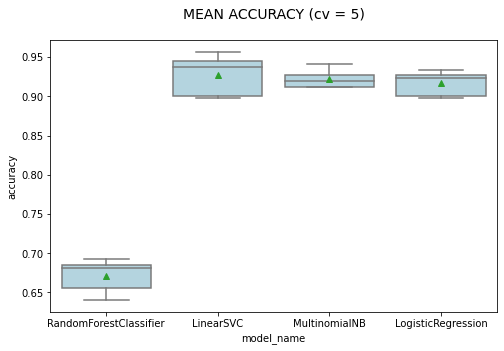

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);